# AI_X_DL

---
---


---
---

# 목록

### 데이터 전처리
    1. 데이터 불러오기
    2. 결측치 확인
    3. 날짜 분류하기
    4. 카운팅
    
### Task 01
    ## 1. 각 순번 별 가장 많이 나오는 숫자 10개
    ## 2. 그래프
    ## 3. 각 번호별 뽑힌 횟수
    ## 4. 뽑힌 횟수를 기준으로 정렬한 데이터 프레임
    
### Task 02
    ## 1. False 번호
    
### Task 03
    ## 1. 로또 API 를 활용한 feature 추가
    ## + 데이터 설명
    ## 2. 이중 for문을 활용한 두 feature의 곱이라는 새로운 feature 추가
    
### Task 04
    ## 0. smart lottery prediction agent
    ## 1. i번째 번호 예측하기
    ## 2. 로또 번호 데이터만 가지고 당첨번호 유무 예측하기
    ## 3. year, month, sales amount, prize money, received money 데이터만 가지고 당첨자 수 예측하기
    ## 4. year, month, sales amount, prize money, received money의 DOUBLE 데이터만 가지고 당첨자 수 예측하기
    ## 5. year, month, sales amount, prize money, received money의 PLUS 데이터만 가지고 당첨자 수 예측하기

### Task 05
    ## 어려웠던 점

---
---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 데이터 전처리
### 데이터 불러오기

In [2]:
df = pd.read_csv("lottery.csv") # csv 파일 불러오기
df.head()

,round,date,first,second,third,fourth,fifth,sixth,bonus
0,989,2021.11.13,17,18,21,27,29,33,26
1,988,2021.11.06,2,13,20,30,31,41,27
2,987,2021.10.30,2,4,15,23,29,38,7
3,986,2021.10.23,7,10,16,28,41,42,40
4,985,2021.10.16,17,21,23,30,34,44,19


---


### 결측치 확인

In [3]:
def check_missing_col(dataframe): # 결측치 확인
    counted_missing_col = 0
    for i, col in enumerate(df.columns):
        missing_values = sum(df[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(df.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(df)

결측치가 존재하지 않습니다


---


### 날짜 분류하기

In [4]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date:
        year_point, month_point, day_point = date.split('.') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(df)
df["year"] = year
df["month"] = month
df["day"] = day
df2 = df.drop(columns = ["date"]) # 문자열 date가 삭제된 DataFrame
df2

,round,first,second,third,fourth,fifth,sixth,bonus,year,month,day
0,989,17,18,21,27,29,33,26,2021,11,13
1,988,2,13,20,30,31,41,27,2021,11,6
2,987,2,4,15,23,29,38,7,2021,10,30
3,986,7,10,16,28,41,42,40,2021,10,23
4,985,17,21,23,30,34,44,19,2021,10,16
...,...,...,...,...,...,...,...,...,...,...,...
984,5,16,24,29,40,41,42,3,2003,1,4
985,4,14,27,30,31,40,42,2,2002,12,28
986,3,11,16,19,21,27,31,30,2002,12,21
987,2,9,13,21,25,32,42,2,2002,12,14


---
### 카운팅
    각 순번별 어떤 숫자가 가장 많이 뽑혔는지를 확인하는 과정

In [5]:
def count_number_in_df(data,str):
    sum1 = 0
    li = [0 for i in range(46)]
    for i in data[str]:
        #print(i)
        li[i] += 1
        sum1 += 1
    print(str,"총합 확인:",sum1)
    return li

li1 = count_number_in_df(df2, "first")
li2 = count_number_in_df(df2, "second")
li3 = count_number_in_df(df2, "third")
li4 = count_number_in_df(df2, "fourth")
li5 = count_number_in_df(df2, "fifth")
li6 = count_number_in_df(df2, "sixth")
li_b = count_number_in_df(df2, "bonus")
li_total = pd.DataFrame([li1,li2,li3,li4,li5,li6,li_b],index=['first', 'second','third','forth','fifth','sixth','bonus'])
li_total = li_total.transpose()
li_total = li_total[1:]


def sum_total(data):
    list_sum = []
    for i in range(1,46):
        list_sum.append(data.loc[i].sum())
    data["total"] = list_sum
    return data

sum_total(li_total)

first 총합 확인: 989
second 총합 확인: 989
third 총합 확인: 989
fourth 총합 확인: 989
fifth 총합 확인: 989
sixth 총합 확인: 989
bonus 총합 확인: 989


,first,second,third,forth,fifth,sixth,bonus,total
1,139,0,0,0,0,0,29,168
2,114,20,0,0,0,0,27,161
3,98,31,3,0,0,0,23,155
4,91,40,4,0,0,0,28,163
5,82,42,5,1,0,0,20,150
6,71,38,11,3,0,0,28,151
7,63,58,10,0,0,0,24,155
8,46,63,17,3,0,0,20,149
9,35,51,14,4,1,0,23,128
10,39,64,33,1,1,0,23,161


---
#### 위 과정의 의미
first로 뽑힌 숫자들은 작은 숫자인 경향이 있고 sixth로 갈 수록 숫자들의 평균이 높아지는 듯한 것을 알 수 있다. 


여기서 생긴 궁금증: 뒤로 갈수록 뽑히는 숫자들이 커지는데 이를 이용하면 로또의 당첨 확률을 높일 수 있을까?

---

----




# Task 01 

The first number in the lottery that comes up the most is 1.
1, 2, 3, 4, 5, 6, 7, 8, 10, 9, are the most drawn first numbers in the lottery.



The second number in the lottery that comes up the most is 10.
10, 8, 7, 12, 11, 9, 15, 13, 14, 18, are the most drawn second numbers in the lottery.



The third number in the lottery that comes up the most is 20.
20, 13, 19, 18, 17, 15, 16, 14, 24, 21, are the most drawn third numbers in the lottery.



The forth number in the lottery that comes up the most is 31.
31, 27, 26, 33, 24, 25, 21, 30, 23, 32, are the most drawn forth numbers in the lottery.



The fifth number in the lottery that comes up the most is 34.
34, 39, 37, 38, 33, 36, 40, 35, 41, 31, are the most drawn fifth numbers in the lottery.



The sixth number in the lottery that comes up the most is 45.
45, 44, 43, 42, 40, 41, 39, 38, 37, 36, are the most drawn sixth numbers in the lottery.



The bonus number in the lottery that comes up the most is 43.
43, 1, 30, 4, 6, 26, 33, 

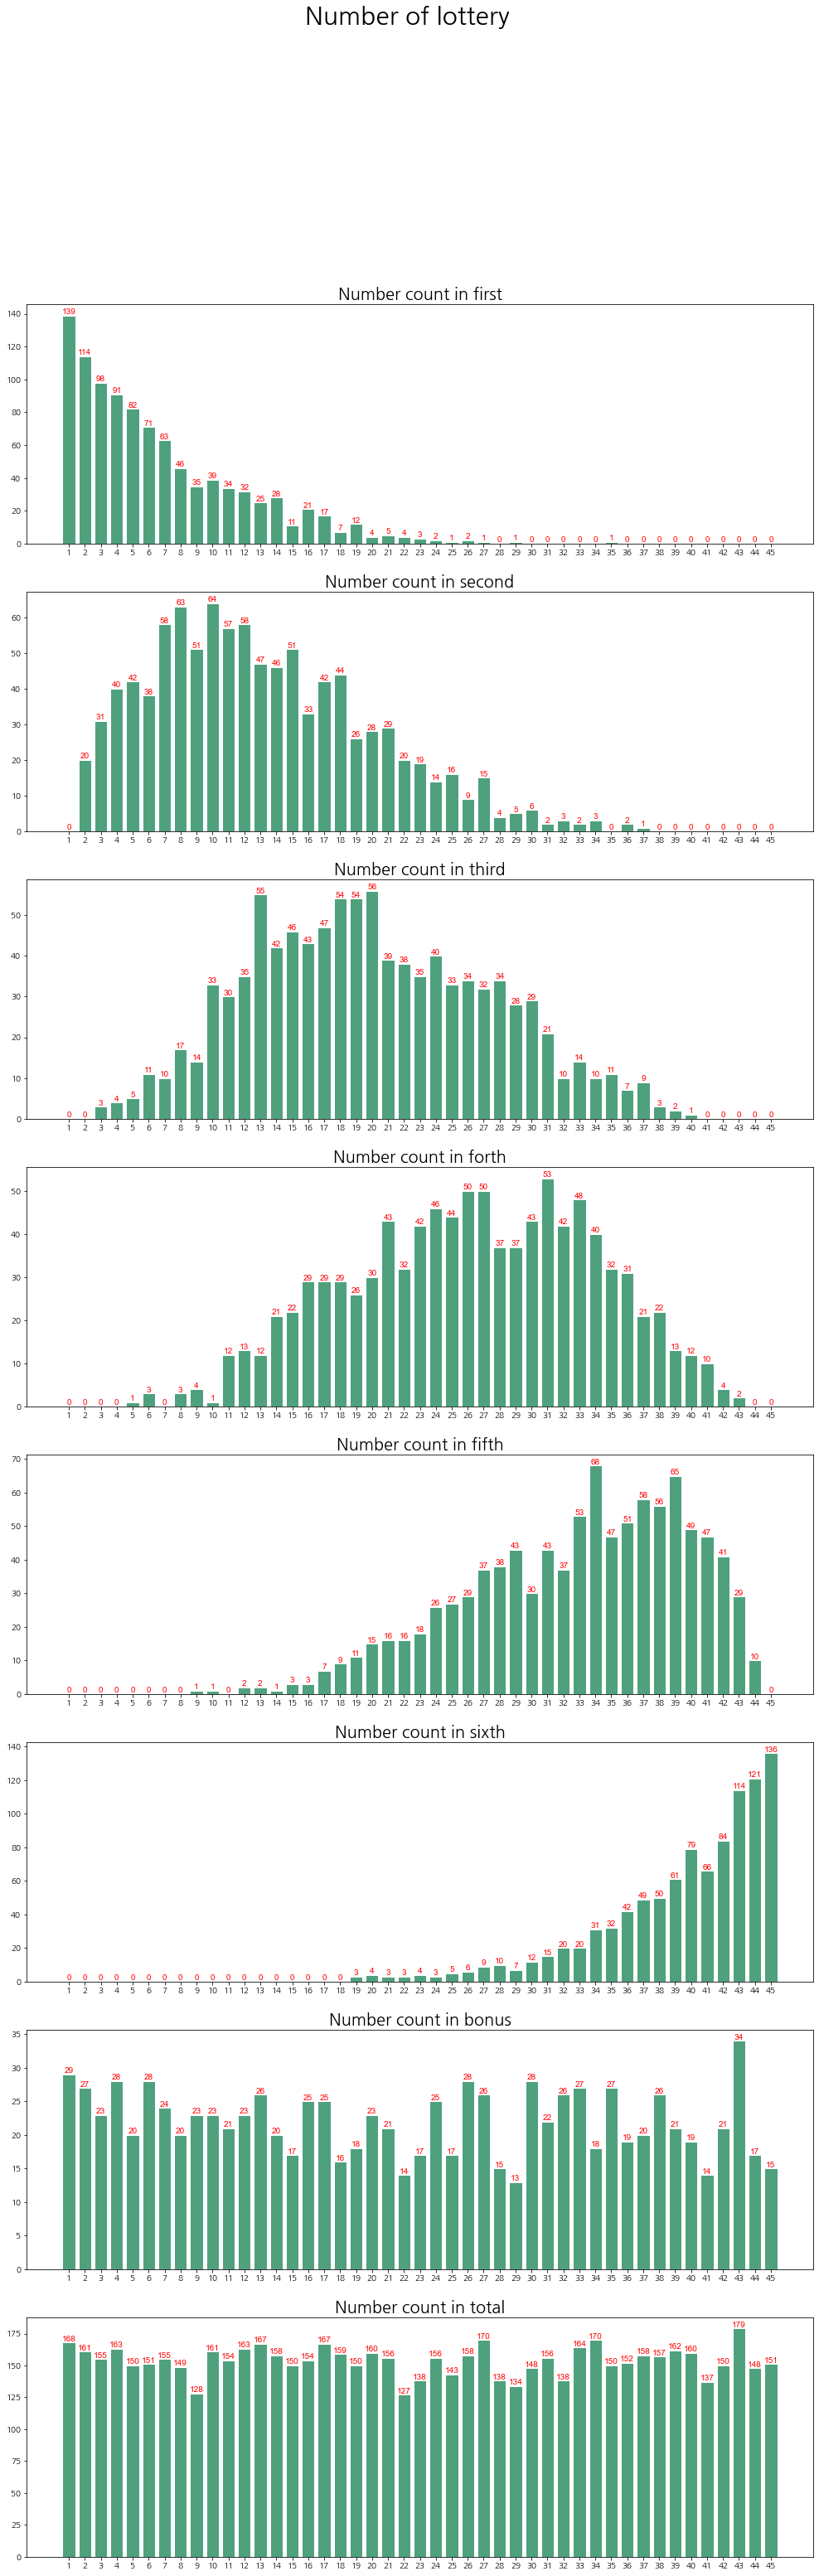

Sort by most occurrences
Number 43 ==> 179 times
Number 27 ==> 170 times
Number 34 ==> 170 times
Number 1 ==> 168 times
Number 17 ==> 167 times
Number 13 ==> 167 times
Number 33 ==> 164 times
Number 4 ==> 163 times
Number 12 ==> 163 times
Number 39 ==> 162 times
Number 10 ==> 161 times
Number 2 ==> 161 times
Number 20 ==> 160 times
Number 40 ==> 160 times
Number 18 ==> 159 times
Number 26 ==> 158 times
Number 14 ==> 158 times
Number 37 ==> 158 times
Number 38 ==> 157 times
Number 31 ==> 156 times
Number 21 ==> 156 times
Number 24 ==> 156 times
Number 3 ==> 155 times
Number 7 ==> 155 times
Number 11 ==> 154 times
Number 16 ==> 154 times
Number 36 ==> 152 times
Number 45 ==> 151 times
Number 6 ==> 151 times
Number 15 ==> 150 times
Number 5 ==> 150 times
Number 42 ==> 150 times
Number 35 ==> 150 times
Number 19 ==> 150 times
Number 8 ==> 149 times
Number 44 ==> 148 times
Number 30 ==> 148 times
Number 25 ==> 143 times
Number 23 ==> 138 times
Number 32 ==> 138 times
Number 28 ==> 138 times

,first,second,third,forth,fifth,sixth,bonus,total
43,0,0,0,2,29,114,34,179
27,1,15,32,50,37,9,26,170
34,0,3,10,40,68,31,18,170
1,139,0,0,0,0,0,29,168
17,17,42,47,29,7,0,25,167
13,25,47,55,12,2,0,26,167
33,0,2,14,48,53,20,27,164
4,91,40,4,0,0,0,28,163
12,32,58,35,13,2,0,23,163
39,0,0,2,13,65,61,21,162


In [6]:
# first~bonus까지 각 번호가 몇 번 나왔는지 확인하는 함수
# data: DataFrame
def total_counting_num(data): 
    ll = data.sort_values(by=["total"], ascending=False)
    print("Sort by most occurrences")
    for i in range(len(ll)):
        print("Number",ll[i:i+1].index.values[0],"==>",ll[i:i+1].values[0][7],"times")
    return data.sort_values(by=["total"], ascending=False)

# first~ bonus까지 각각 어떤 숫자들이 가장 많이 나왔는지를 확인하는 함수
# data: DataFrame, string: data의 각 column 이름, heading: 몇 번째 숫자까지 확인할 것인지 
def counting_num(data,string, heading): 
    li_dummy = data.sort_values(by=[string], ascending=False).head(n=heading).index.to_list()
    print("The {0} number in the lottery that comes up the most is {1}.".format(string,li_dummy[0]))

    for i in range(heading):
        print(li_dummy[i],end=", ")
    print("are the most drawn {} numbers in the lottery.".format(string))
    print("\n\n")
        
# first~ bonus까지 각각 어떤 숫자들이 많이 나왔는지 bar 그래프를 그려주는 함수
# data: DataFrame
def draw_bar(data):
    ad = data.columns.to_list()
    aa = data.index.to_list()
    fig, ax = plt.subplots(8, 1, figsize=(17,50))
    fig.suptitle('Number of lottery', fontsize=30)
    sns.set(style="darkgrid")
    
    for i in range(len(ad)):
        ax[i].bar(x=aa,height = list(data[ad[i]].values),color="#4FA17D")
        ax[i].set_xticks(aa)
        s = 'Number count in '+ad[i]
        ax[i].set_title(s, fontsize = 20)
        for j, v in enumerate(aa):
            ax[i].text(v, list(data[ad[i]].values)[j], list(data[ad[i]].values)[j],  # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                     fontsize = 10, 
                     color='red',
                     horizontalalignment='center',  # horizontalalignment (left, center, right)
                     verticalalignment='bottom')    # verticalalignment (top, center, bottom)
        counting_num(data,ad[i],10) # heading 기본값은 10
    plt.show()
    
draw_bar(li_total)
total_counting_num(li_total)

---
#### 위 과정의 의미
first로 뽑힌 숫자들은 작은 숫자인 경향이 있고 sixth로 갈 수록 숫자들의 평균이 높아지는 것을 그래프를 통해 확인할 수 있다. 하지만 bonus나 전체를 놓고 봤을때 각 번호가 뽑히는 확률이 비슷함을 그래프를 통해 확인할 수 있다.

---

----




# Task 02
## 1. False 번호

In [7]:
# 1~45까지의 정수 중 기존에 뽑히지 않았던 수를 뽑는 함수
# random.randint()를 이용한다.
def pick():
    import random
    result = []
    for i in range(7):
        a = random.randint(1,45)
        if not result: 
            result.append(a)
            continue
        while(a in result):
            a = random.randint(1,45)
        result.append(a)
    return result

# 1~45까지의 정수 중 기존에 뽑히지 않았던 수를 뽑는 함수 
# 단, 위의 Task 1 그래프에서 확인했듯이 first~bonus까지의 각 숫자가 나타난 빈도수를 이용해 값을 추출한다.
# random.choice()함수를 이용한다.
def pick_number():
    import random
    result = []
    for j in li_total:
        if(j == "total"): break
        list_number = li_total[j].to_list()
        lll= []
        for i in range(45):
            list_number[i] = [i+1,list_number[i]+1]
            for k in range(list_number[i][1]):
                lll.append(list_number[i][0])
        a = random.choice(lll)
        
        if not result: 
            result.append(a)
            continue
        while(a in result):
            a = random.choice(lll)
        result.append(a)
    return result

# first~bonus까지 숫자 7개를 추출하는데 pick_number()함수를 이용한다.
def create_new_number(data,index):
    a = data.loc[index].to_list()
    li =[]
    li.append(a[0])
    random_number = pick_number()
    li += random_number
    li.append(a[8])
    li.append(a[9])
    li.append(a[10])
    return li

# first~bonus까지 숫자 7개를 추출하는데 pick()함수를 이용한다.
def create_new_number_0(data,index):
    import random
    a = data.loc[index].to_list()
    li =[]
    li.append(a[0])
    random_number = pick()
    li += random_number
    li.append(a[8])
    li.append(a[9])
    li.append(a[10])
    return li

In [8]:
df2 = df.drop(columns = ["date"])

new_df = pd.DataFrame()
for i in range(len(df2)):
    df_dumm = pd.DataFrame(create_new_number(df2,i), index=df2.columns.to_list())
    df_dumm = df_dumm.transpose()
    new_df = new_df.append(df_dumm)
new_df["win"] = 0 # 당첨 번호가 아닌 미당첨 번호를 새로 생성한 DataFrame
# new_df 

df2_win = df2
df2_win["win"] =1 

In [9]:
# 당첨 번호와 미당첨 번호를 합친 새로운 DataFrame
merge_df = pd.concat([df2_win,new_df],ignore_index=True)
merge_df2 = merge_df.sort_values(by = ["round","win"])
print("head\n\n",merge_df2.head(n=10))
print("\n\n\n\n")
print("tail\n\n", merge_df2.tail(n=10))

head

       round  first  second  third  fourth  fifth  sixth  bonus  year  month  \
1977      1      2       9     14      37     36     34     44  2002     12   
988       1     10      23     29      33     37     40     16  2002     12   
1976      2      3      43     35      23     29     44      7  2002     12   
987       2      9      13     21      25     32     42      2  2002     12   
1975      3     18      13     29      36     25     38     28  2002     12   
986       3     11      16     19      21     27     31     30  2002     12   
1974      4      8      21     15      26     25     36     42  2002     12   
985       4     14      27     30      31     40     42      2  2002     12   
1973      5      1       6     23       9     39     43     29  2003      1   
984       5     16      24     29      40     41     42      3  2003      1   

      day  win  
1977    7    0  
988     7    1  
1976   14    0  
987    14    1  
1975   21    0  
986    21    1  
1974

----




# Task 03

## 0. Feature engineering

## 1. 로또 API 를 활용한 feature 추가

In [10]:
# 로또 API를 이용해서 외부에 있는 데이터를 받아오는 셀 
# import pandas as pd 
# import requests 
# from tqdm import tqdm 
# import json 

# def getLottoWinInfo(minDrwNo, maxDrwNo): 
#     drwtNo1 = [] 
#     drwtNo2 = [] 
#     drwtNo3 = [] 
#     drwtNo4 = [] 
#     drwtNo5 = [] 
#     drwtNo6 = [] 
#     bnusNo = [] 
#     totSellamnt = [] 
#     drwNoDate = [] 
#     firstAccumamnt = [] 
#     firstPrzwnerCo = [] 
#     firstWinamnt = [] 
#     for i in tqdm(range(minDrwNo, maxDrwNo+1, 1)): 
#         req_url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=" + str(i) 
#         req_lotto = requests.get(req_url) 
#         lottoNo = req_lotto.json() 
#         drwtNo1.append(lottoNo['drwtNo1']) 
#         drwtNo2.append(lottoNo['drwtNo2']) 
#         drwtNo3.append(lottoNo['drwtNo3']) 
#         drwtNo4.append(lottoNo['drwtNo4']) 
#         drwtNo5.append(lottoNo['drwtNo5']) 
#         drwtNo6.append(lottoNo['drwtNo6'])
#         bnusNo.append(lottoNo['bnusNo']) 
#         totSellamnt.append(lottoNo['totSellamnt'])
#         drwNoDate.append(lottoNo['drwNoDate'])
#         firstAccumamnt.append(lottoNo['firstAccumamnt']) 
#         firstPrzwnerCo.append(lottoNo['firstPrzwnerCo']) 
#         firstWinamnt.append(lottoNo['firstWinamnt'])
#         lotto_dict = {"추첨일":drwNoDate, "Num1":drwtNo1, "Num2":drwtNo2, "Num3":drwtNo3, "Num4":drwtNo4, "Num5":drwtNo5, "Num6":drwtNo6, "bnsNum":bnusNo, "총판매금액":totSellamnt, "총1등당첨금":firstAccumamnt, "1등당첨인원":firstPrzwnerCo, "1등수령액":firstWinamnt} 
#     df_lotto = pd.DataFrame(lotto_dict) 
#     return df_lotto

# get_lottery = getLottoWinInfo(1,989)
# get_lottery.to_csv('lotto_info.csv', index= False)

---
---

## 데이터 설명
"총판매금액":"sales amount"

"총1등당첨금": "prize money"

"1등당첨인원": "winner"

"1등수령액": "received money"

In [11]:
# 매번 로또 API를 활용하여 데이터를 받아오는 과정은 시간이 오래걸리므로 csv파일로 만들어 저장.
get_lottery = pd.read_csv("lotto_info.csv")
get_lottery["round"] = 0
for i in range(990):
    get_lottery["round"][i] = i+1
get_lottery1 = get_lottery[["총판매금액","총1등당첨금","1등당첨인원","1등수령액", "round"]]
get_lottery1.rename(columns = {"총판매금액":"sales amount", "총1등당첨금": "prize money", "1등당첨인원": "winner", "1등수령액": "received money"},inplace=True)
merge_df3 = pd.merge(merge_df,get_lottery1) #외부 데이터에서 가져온 정보를 새로운 feature로 추가
merge_df3 = merge_df3.sort_values(by = ["round","win"])
merge_df3


<ipython-input-11-02234712e4aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_lottery["round"][i] = i+1
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,round,first,second,third,fourth,fifth,sixth,bonus,year,month,day,win,sales amount,prize money,winner,received money
1977,1,2,9,14,37,36,34,44,2002,12,7,0,3681782000,863604600,0,0
1976,1,10,23,29,33,37,40,16,2002,12,7,1,3681782000,863604600,0,0
1975,2,3,43,35,23,29,44,7,2002,12,14,0,4904274000,0,1,2002006800
1974,2,9,13,21,25,32,42,2,2002,12,14,1,4904274000,0,1,2002006800
1973,3,18,13,29,36,25,38,28,2002,12,21,0,4729342000,0,1,2000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,987,2,4,15,23,29,38,7,2021,10,30,1,100269530000,23787116250,10,2378711625
3,988,19,10,17,30,36,42,4,2021,11,6,0,98606195000,24106404375,9,2678489375
2,988,2,13,20,30,31,41,27,2021,11,6,1,98606195000,24106404375,9,2678489375
1,989,11,16,39,25,38,35,20,2021,11,13,0,96525658000,23307074252,4,5826768563


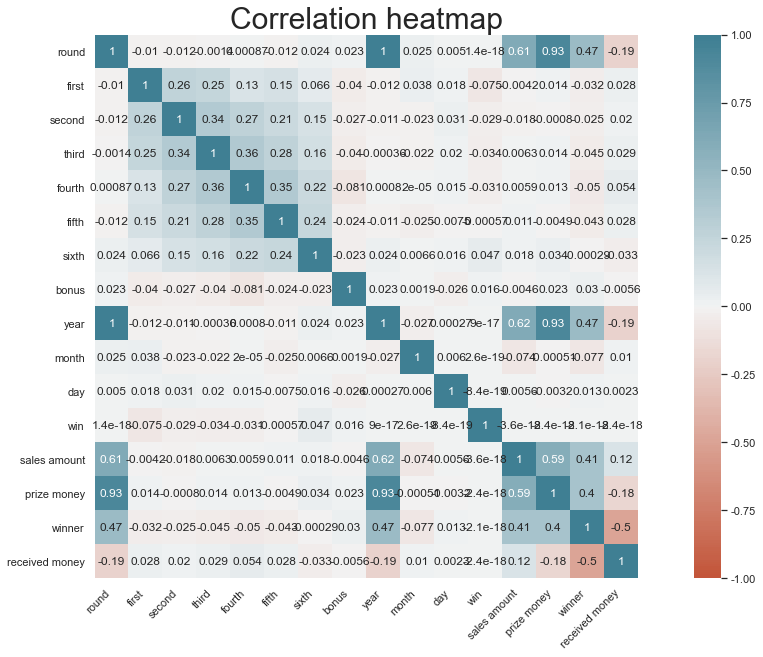

In [12]:
# 각 데이터들 사이의 연관성 확인
corr = merge_df3.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

---
#### 위 과정의 의미
위 Correlation heatmap을 보면 win과 큰 상관관계를 가지는 변수가 없다. 즉 변수들 중 win을 결정짓는 중요한 요소가 없다고 판단된다.

하지만 winner는 year, round, sales amount, prize money, received money등의 feature들과 어느정도 상관관계가 있다는 것을 확인 할 수 있다. 따라서 예측 모델을 만들때 해당 번호가 다음 라운드의 당첨번호가 될지를 예측하는 것보다(정확도가 매우 낮으므로) 다음 라운드의 몇 명의 1등 당첨자가 나올지를 예측하는 것이 더 유의미한 결과를 이끌어 낼 것이라 사려된다.

---

## 2. 이중 for문을 활용한 두 feature의 곱이라는 새로운 feature 추가

In [13]:
# win == 1인 값들만을 이용해 새로운 feature를 생성,추가했다.
X = merge_df3[merge_df3["win"]==1].drop(['win'],axis=1)
y = merge_df3[merge_df3["win"]==1]['win']

X_double = X.copy()
col_list = X_double.columns

# 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 곱이라는 새로운 feature를 추가합니다.
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_double[f'{col_list[i]}*{col_list[j]}'] = X_double[col_list[i]] * X_double[col_list[j]]
X_double

,round,first,second,third,fourth,fifth,sixth,bonus,year,month,...,sales amount*sales amount,sales amount*prize money,sales amount*winner,sales amount*received money,prize money*prize money,prize money*winner,prize money*received money,winner*winner,winner*received money,received money*received money
1976,1,10,23,29,33,37,40,16,2002,12,...,-4891225378185551616,3179603871397200000,0,0,745812905141160000,0,0,0,0,0
1974,2,9,13,21,25,32,42,2,2002,12,...,5605159393366448384,0,4904274000,-8628354176646351616,0,0,0,1,2002006800,4008031227246240000
1972,3,11,16,19,21,27,31,30,2002,12,...,3919931679254448384,0,4729342000,-8988060073709551616,0,0,0,1,2000000000,4000000000000000000
1970,4,14,27,30,31,40,42,2,2002,12,...,-9105155444123103232,6679720847500800000,0,0,1605662026467840000,0,0,0,0,0
1968,5,16,24,29,40,41,42,3,2003,1,...,2508521370984896768,642518805270248384,0,0,-9198485882903541616,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,985,17,21,23,30,34,44,19,2021,10,...,5374245618563195136,7737891543276789920,988114460000,773789154327678992,2506394568429410788,243475297500,3939988271584851402,100,24347529750,5928022049271350625
6,986,7,10,16,28,41,42,40,2021,10,...,-4500626475881459712,-8681304223272606848,990412400000,-4557479237069171008,-7655874340619537596,237527512500,1079086973309001402,100,23752751250,5641931919443765625
4,987,2,4,15,23,29,38,7,2021,10,...,503126249194369280,5492980934330341536,1002695300000,-1295376313937921008,-6022166793982037596,237871162500,1242457727972751402,100,23787116250,5658268994910140625
2,988,2,13,20,30,31,41,27,2021,11,...,1747565533091298368,-2589174958429033464,887455755000,5861228584744402376,-9177078467686511087,216957639375,-9218228306947190839,81,24106404375,7174305331987890625


---
#### 위 과정의 의미
"win" 열을 제외한 DataFrame의 각 열들을 자기 자신 혹은 다른 열과 곱한 후 새로운 열로 저장한다. 데이터의 양을 늘려 데이터 분석과 예측에 사용할 수 있다.

---

----




# Task 04

## 0. smart lottery prediction agent

In [14]:
def check_lotto(data1,data2):
    data_1 = data1[data1["round"] == data2[0]]
    li1 = data_1.drop(columns=["round", "year","month","day","win"]).values.tolist()[0]
    li2 = data2[1:8]
    re = True
    flag = False
    cnt = 0
    
    for i in li2:
        if(i in li1):
            if(i == li1[6]):
                flag=True
                cnt+=1
            else:
                cnt+=1
    
    if(flag==False):
        if(cnt==6):
            print("1등 당첨\n")
        elif(cnt==5):
            print("3등 당첨\n")
        elif(cnt==4):
            print("4등 당첨")
            print("당첨금 50,000원\n")
        elif(cnt==3):
            print("5등 당첨")
            print("당첨금 5,000원\n")
        else:
            print("꽝\n")
            re = False
    else:
        if(cnt==7):
            print("1등 당첨\n")
        elif(cnt==6):
            print("2등 당첨\n")
        elif(cnt==5):
            print("4등 당첨")
            print("당첨금 50,000원\n")
        elif(cnt==4):
            print("5등 당첨")
            print("당첨금 5,000원\n")
        else:
            print("꽝\n")
            re = False
    return re
            
def check_lotto_count(data1,data2,re):
    data_1 = data1[data1["round"] == data2[0]]
    li1 = data_1.drop(columns=["round", "year","month","day","win"]).values.tolist()[0]
    li2 = data2[1:8]
    flag = False
    cnt = 0
    
#     print(data_1["round"].values[0],"회 당첨 번호 : ", end="")
#     for i in range(7):
#         print(li1[i], end=" ")
#     print()
#     print(data_1["round"].values[0],"회 나의 번호 : ", end="")
#     for i in range(7):
#         print(li2[i], end=" ")
#     print("\n")
    for i in li2:
        if(i in li1):
            if(i == li1[6]):
                flag=True
                cnt+=1
            else:
                cnt+=1
    
    if(flag==False):
        if(cnt==6):
            #print("1등 당첨\n")
            re[0] += 1 
        elif(cnt==5):
            #print("3등 당첨\n")
            re[2] += 1
        elif(cnt==4):
            #print("4등 당첨")
            #print("당첨금 50,000원\n")
            re[3] += 1
        elif(cnt==3):
            #print("5등 당첨")
            #print("당첨금 5,000원\n")
            re[4] += 1
        #else:
            #print("꽝\n")
    else:
        if(cnt==7):
            #print("1등 당첨\n")
            re[0] += 1
        elif(cnt==6):
            #print("2등 당첨\n")
            re[1] += 1
        elif(cnt==5):
            #print("4등 당첨")
            #print("당첨금 50,000원\n")
            re[3] += 1
        elif(cnt==4):
            #print("5등 당첨")
            #print("당첨금 5,000원\n")
            re[4] += 1
        #else:
            #print("꽝\n")
    return re


def check_prize(data,n):
    re = [0 for i in range(5)]
    for i in range(n):
        pnum = create_new_number(data,0)
        check_lotto_count(data,pnum,re)
    cnt = 0
    for i in re:
        cnt+=i
    print("분포 추출 방식으로 {}회 로또를 {}번 구매했을 때 당첨된 로또 수: {}".format(data["round"].values[0],n,cnt))
    return cnt
    
def check_prize2(data,n):
    re = [0 for i in range(5)]
    for i in range(n):
        pnum = create_new_number_0(data,0)
        check_lotto_count(data,pnum,re)
    cnt = 0
    for i in re:
        cnt+=i
    print("randint 방식으로 {}회 로또를 {}번 구매했을 때 당첨된 로또 수: {}".format(data["round"].values[0],n,cnt))
    return cnt

In [15]:
resu0 = []
resu1 = []
for i in range(100):
    resu0.append(check_prize(df2,1000))
    resu1.append(check_prize2(df2,1000))
print()
print("분포 추출 방식 평균 당첨 횟수:",np.mean(resu0))
print("randint 방식 평균 당첨 횟수:", np.mean(resu1))

분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 37
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 34
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 46
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 41
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 40
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 39
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 39
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 38
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 40
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 38
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 39
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 34
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 26
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 38
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 34
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 44
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 32
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 36
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 38
randint 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 37
분포 추출 방식으로 989회 로또를 1000번 구매했을 때 당첨된 로또 수: 37
randint 방식으로 9

---
#### 위 과정의 의미
random.randint를 이용해서 난수를 추출하는 경우와 각 순서별 숫자 분포도를 활용해 데이터를 추출하는 2가지 경우 사이의 당첨확률 차이는 미미합니다. 즉 로또는 완전한 확률 게임이라는 판단을 할 수 있습니다.


---

## 1. i번째 번호 예측하기

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def ml_fit(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]} 중 {accuracy * 100:.3f}% 정확도로 맞춤')
    return model

In [18]:
merge_df4 = merge_df3[merge_df3["win"]==1]
merge_df4 = merge_df4.reset_index(drop = True, inplace=False) 

# for문을 이용하여 i번째 수를 예측하는 코드

for i in range(1,8):
    print(i,"번째 숫자 예측")
    li = []
    for j in range(1,8):
        li.append(j)
    li.remove(i)
    data = merge_df4.iloc[:,li].values
    target =  merge_df4.iloc[:,i].values
    x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, random_state=13)

    model = ml_fit(RandomForestClassifier(n_estimators=100))
    #model = ml_fit(LogisticRegression(solver='lbfgs'))
    model = ml_fit(SVC(gamma='scale'))
    model = ml_fit(KNeighborsClassifier())
    model = ml_fit(GaussianNB())
    model = ml_fit(DecisionTreeClassifier())
    print()

1 번째 숫자 예측
RandomForestClassifier()
총 396 중 11.616% 정확도로 맞춤
SVC()
총 396 중 12.374% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 11.869% 정확도로 맞춤
GaussianNB()
총 396 중 13.384% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 14.141% 정확도로 맞춤

2 번째 숫자 예측
RandomForestClassifier()
총 396 중 10.354% 정확도로 맞춤
SVC()
총 396 중 8.081% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 7.323% 정확도로 맞춤
GaussianNB()
총 396 중 13.636% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 8.081% 정확도로 맞춤

3 번째 숫자 예측
RandomForestClassifier()
총 396 중 12.121% 정확도로 맞춤
SVC()
총 396 중 8.081% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 6.566% 정확도로 맞춤
GaussianNB()
총 396 중 9.596% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 13.636% 정확도로 맞춤

4 번째 숫자 예측
RandomForestClassifier()
총 396 중 13.636% 정확도로 맞춤
SVC()
총 396 중 8.586% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 7.576% 정확도로 맞춤
GaussianNB()
총 396 중 11.616% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 12.374% 정확도로 맞춤

5 번째 숫자 예측
RandomForestClassifier()
총 396 중 13.384% 정확도로 맞춤
SVC()
총 396 중 9.596% 정확도로 맞춤
KNeighborsClassifier()


---

#### 위 과정의 의미
i 번째 자릿수 번호를 예측하기 위해 다른 자릿수의 번호를 이용하여 정확도를 확인해 보았습니다. 대략적으로 10%의 정확도로 다른 번호를 예측할 수 있으나 이는 실제 로또를 구매함에 있어 유용하지 않은 정보 입니다. 왜냐하면 다른 자릿수의 당첨 번호를 전부 알고 있는 경우조차 10%의 확률로 정답을 맞추는 것이기 때문에 실제 경제성이 없다고 판단됩니다.


---

## 2. 로또 번호 데이터만 가지고 당첨번호 유무 예측하기

In [19]:
#data = merge_df3.drop('win', axis=1).values
data = merge_df3.iloc[:,[1,2,3,4,5,6,7]].values
target = merge_df3['win'].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=13)

model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier()
총 792 중 84.596% 정확도로 맞춤
LogisticRegression()
총 792 중 50.126% 정확도로 맞춤
SVC()
총 792 중 81.313% 정확도로 맞춤
KNeighborsClassifier()
총 792 중 78.535% 정확도로 맞춤
GaussianNB()
총 792 중 56.061% 정확도로 맞춤
DecisionTreeClassifier()
총 792 중 76.894% 정확도로 맞춤


---
#### 위 과정의 의미
기존의 데이터 중 로또 번호만을 가지고 당첨 번호의 유무를 판별하는 것은 RandomForestClassifier()를 사용한 경우가 가장 높은 정확도를 보여주었습니다. 하지만 기존의 데이터가 당첨 데이터인지 아닌지를 판별하는 것과 다음 회차의 당첨 번호를 추출하는 것은 전혀 다른 이야기라고 생각합니다. 다음 회차의 데이터를 예측하는 것은 세상을 움직이는 확률의 법칙을 뒤집는 일이므로 불가능하다고 결론을 내렸습니다.

---


다음 회차의 당첨 번호를 예측하기 위해서는 모델이 기존의 데이터를 학습해 규칙을 찾은 후 다음 회차에 적용을 해야 하는데 완전한 확률 도박인 로또에서 규칙을 찾기란 불가능에 가까운 일이기에 지금 저의 수준에서는 불가능하다고 판단내렸습니다. 따라서 당첨번호가 아닌 다른 값을 예측함으로써 유의미한 결과를 이끌어 내고자 했습니다.


---

## 3. year, month, sales amount, prize money, received money 데이터만 가지고 당첨자 수 예측하기

In [20]:
data = merge_df4.iloc[:,[8,9,12,13,15]].values
target = merge_df4["winner"].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4,random_state=13)

model = ml_fit(RandomForestClassifier(n_estimators=100))
#model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier()
총 396 중 75.253% 정확도로 맞춤
SVC()
총 396 중 11.111% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 30.556% 정확도로 맞춤
GaussianNB()
총 396 중 34.848% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 71.717% 정확도로 맞춤


---
#### 위 과정의 의미
Task 3의 Correlation heatmap을 분석했을 때 당첨자 수와 상관관계가 있는 feature중 당첨자 수를 특정할 수 있는 round를 제외한 나머지 feature를 가지고 예측을 했을 경우 RandomForestClassifier() 70% 이상의 예측률을 보여준다.

---

## 4. year, month, sales amount, prize money, received money의 DOUBLE 데이터만 가지고 당첨자 수 예측하기

In [21]:
X2 = merge_df4[merge_df4["win"]==1].drop(columns=['winner'],axis=1)
X2 = merge_df4.iloc[:,[8,9,12,13,15]]
print(X2)
X_double2 = X2.copy()
col_list = X_double2.columns

# 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 곱이라는 새로운 feature를 추가합니다.
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_double2[f'{col_list[i]}*{col_list[j]}'] = X_double2[col_list[i]] * X_double2[col_list[j]]

data = X_double2.values
target = merge_df4["winner"].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, random_state=13)

model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

     year  month  sales amount  prize money  received money
0    2002     12    3681782000    863604600               0
1    2002     12    4904274000            0      2002006800
2    2002     12    4729342000            0      2000000000
3    2002     12    5271464000   1267147200               0
4    2003      1    6277102000   3041094900               0
..    ...    ...           ...          ...             ...
984  2021     10   98811446000  24347529750      2434752975
985  2021     10   99041240000  23752751250      2375275125
986  2021     10  100269530000  23787116250      2378711625
987  2021     11   98606195000  24106404375      2678489375
988  2021     11   96525658000  23307074252      5826768563

[989 rows x 5 columns]
RandomForestClassifier()
총 396 중 69.444% 정확도로 맞춤
LogisticRegression()
총 396 중 13.131% 정확도로 맞춤
SVC()
총 396 중 15.152% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 14.899% 정확도로 맞춤
GaussianNB()
총 396 중 13.889% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 63.889% 정확도로 맞춤

---
#### 위 과정의 의미
Task 4의 2번 정확도를 높이기 위해 feature들의 곱을 이용했지만 오히려 정확도가 떨어지는 결과로 이어졌다. 즉 year와 month를 이용해 값들을 곱하는 것은 무의미한 작업이라고 생각된다.


---


## 5. year, sales amount, prize money, received money의 PLUS 데이터만 가지고 당첨자 수 예측하기

In [22]:
X2 = merge_df4[merge_df4["win"]==1].drop(columns=['winner'],axis=1)
X2 = merge_df4.iloc[:,[8,12,13,15]]
print(X2)
X_PLUS = X2.copy()
col_list = X_PLUS.columns

# 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 합이라는 새로운 feature를 추가합니다.
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_PLUS[f'{col_list[i]}+{col_list[j]}'] = X_PLUS[col_list[i]] + X_PLUS[col_list[j]]

data = X_PLUS.values
target = merge_df4["winner"].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, random_state=13)

model = ml_fit(RandomForestClassifier(n_estimators=100))
#model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

     year  sales amount  prize money  received money
0    2002    3681782000    863604600               0
1    2002    4904274000            0      2002006800
2    2002    4729342000            0      2000000000
3    2002    5271464000   1267147200               0
4    2003    6277102000   3041094900               0
..    ...           ...          ...             ...
984  2021   98811446000  24347529750      2434752975
985  2021   99041240000  23752751250      2375275125
986  2021  100269530000  23787116250      2378711625
987  2021   98606195000  24106404375      2678489375
988  2021   96525658000  23307074252      5826768563

[989 rows x 4 columns]
RandomForestClassifier()
총 396 중 76.515% 정확도로 맞춤
SVC()
총 396 중 11.111% 정확도로 맞춤
KNeighborsClassifier()
총 396 중 30.303% 정확도로 맞춤
GaussianNB()
총 396 중 35.101% 정확도로 맞춤
DecisionTreeClassifier()
총 396 중 69.444% 정확도로 맞춤


---
#### 위 과정의 의미
Task 4의 3번 정확도를 높이기 위해 feature들의 합을 이용했고 month feature를 제외하여 값을 구했더니 정확도를 높일 수 있었다. 즉 상관계수가 큰 feature들의 양을 for문을 통해 제곱으로 늘리는 것은 유의미한 결과를 도출하는데 도움을 준다고 결론 지었습니다.


---


----




# Task 05

## 어려웠던 점


데이터들 사이의 규칙을 찾아서 머신러닝(딥러닝 포함) 모델에 학습을 시키려면 사람이 규칙을 찾기 위한 최소한의 실마리가 있어야 한다는 것을 느꼈습니다. 로또의 경우 벼락 맞아 죽을 확률인 428만9651분의 1보다 두배나 높은 814만5060분의 1인 확률을 가지고 있습니다. 즉 외부적인 요인의 간섭이 거의 없는 완전한 확률의 영역이기 때문에(각 숫자들 사이의 규칙이 없으므로..) 머신러닝 모델을 가지고 다음 회차의 수를 예측하려는 시도 속에서 무의미함을 느꼇습니다. Task1을 진행하며 first~sixth로 갈수록 숫자들의 평균적인 분포의 모양이 변함을 확인했기에 이를 이용하면 확률을 높일 수 있지 않을까 하는 희망도 있었습니다. 하지만 결국에는 random.randint를 통한 추출보다 당첨 확률이 적거나 그 차이가 거의 없다는 것을 눈으로 직접 확인하며 규칙을 찾으려고 했던 저의 활동이 무가치 했음에 스트레스를 받았던 점이 이번 Task의 어려운 점이었습니다. 

Task4를 진행하며 번호 하나를 예측하는 것조차 10% 언저리의 확률이 나오기에 로또를 머신러닝, 딥러닝으로 정확히 예측하는 것은 어려운 일임을 느꼈습니다.

번호를 예측하고 정확도를 측정하는 것보다 외부 API에서 얻은 당첨자의 수를 예측하는 것이 더욱 가치 있는 결과를 얻을 수 있겠다는 생각에 Correlation heatmap에서 높은 상관관계를 보였던 year, sales amount, prize money, received money라는 feature들을 이용해 진행을 
했고 Task4의 3,4,5를 진행하며 정확도를 높였습니다. 양자컴퓨터, 슈퍼 컴퓨터 등 고성능의 정보 처리 장치가 개발된다고 하더라도 1~45 중 무작위의 7개 숫자를 뽑는 로또에서 규칙을 찾아내기란 어려울 것이라 생각하게 되었습니다.